# Monte Carlo Basics: Estimation, Error, and Convergence

This notebook introduces Monte Carlo simulation from first principles.
The goal is to understand:

- Monte Carlo estimation as numerical integration
- Sampling error and variability
- Convergence via the Law of Large Numbers
- Statistical error via confidence intervals

This notebook is intentionally non-financial.
Finance-specific applications will be built on top of this foundation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Monte Carlo as Numerical Integration

Monte Carlo methods approximate expectations of random variables.

Mathematically, we want to compute:


$\mathbb{E}[f(x)] = \int f(x)\, p_X(x)\, dx$


where the distribution of $X$ is known, but the expectation is not
available in closed form.

Monte Carlo replaces the expectation with a sample average.

Monte Carlo draws i.i.d. samples $X_1,\dots,X_N \sim p_X$ and uses the estimator

$\widehat{\mu}_N \;=\; \frac{1}{N}\sum_{i=1}^N f(X_i).$


By the Law of Large Numbers,
$\widehat{\mu}_N \xrightarrow[N\to\infty]{a.s.} \mathbb{E}[f(X)].$

Moreover, $\sqrt{N}(\hat{\mu}_N - \mathbb{E}[f(X)])$ converges in distribution to a normal random variable, so the Monte Carlo error is $O(N^{-1/2})$.

In [ ]:
np.random.seed(42)

N = 10_000
samples = np.random.uniform(0, 1, size=N)

estimate = np.mean(samples)
estimate

np.float64(0.49415955768429964)

## Monte Carlo Error

Monte Carlo estimates are random.

Even with the same model, different random samples produce
different estimates.

In [ ]:
def monte_carlo_estimate(N):
    samples = np.random.uniform(0, 1, size=N)
    return np.mean(samples)

runs = 100
estimates = [monte_carlo_estimate(N) for _ in range(runs)]

np.mean(estimates), np.std(estimates)

(np.float64(0.5003971672548878), np.float64(0.002962765857709418))

## Law of Large Numbers (LLN)

As the number of samples increases, the Monte Carlo estimator
converges to the true expectation.

This convergence is slow:

$\text{error} \sim \mathcal{O}(N^{-1/2})$


Doubling accuracy requires roughly **four times** more samples.

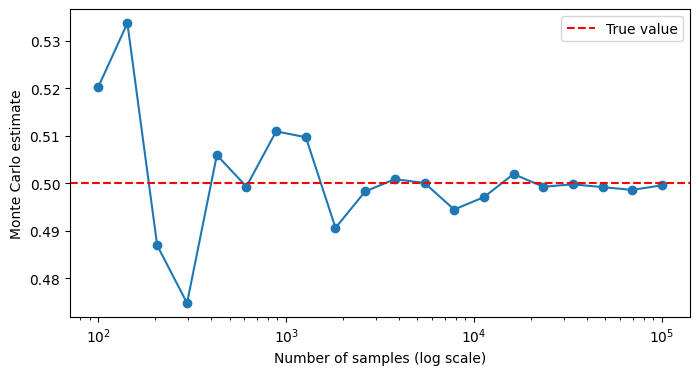

In [ ]:
sample_sizes = np.logspace(2, 5, 20, dtype=int)
estimates_lln = []

for n in sample_sizes:
    samples = np.random.uniform(0, 1, size=n)
    estimates_lln.append(np.mean(samples))

plt.figure(figsize=(8, 4))
plt.plot(sample_sizes, estimates_lln, marker='o')
plt.axhline(0.5, color='red', linestyle='--', label='True value')
plt.xscale('log')
plt.xlabel('Number of samples (log scale)')
plt.ylabel('Monte Carlo estimate')
plt.legend()
plt.show()

## Central Limit Theorem (CLT)

For large \(N\), the Monte Carlo estimator satisfies:


$\sqrt{N}(\hat{\mu}_N - \mu) \Rightarrow \mathcal{N}(0, \sigma^2)$


This allows us to quantify uncertainty using confidence intervals.

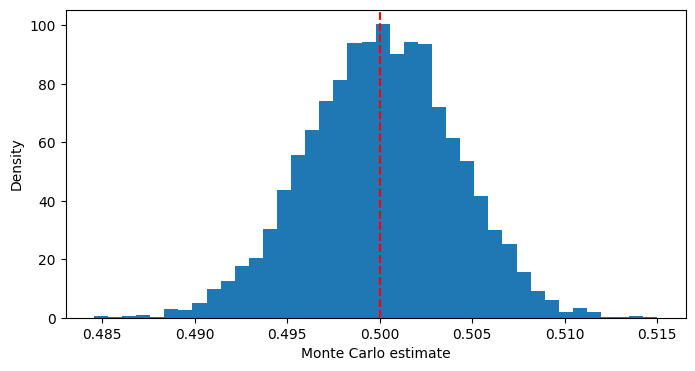

In [ ]:
N = 5_000
runs = 5_000

estimates = [monte_carlo_estimate(N) for _ in range(runs)]

plt.figure(figsize=(8, 4))
plt.hist(estimates, bins=40, density=True)
plt.axvline(0.5, color='red', linestyle='--')
plt.xlabel('Monte Carlo estimate')
plt.ylabel('Density')
plt.show()

## Confidence Intervals

Using the CLT, an approximate 95% confidence interval is:


$\hat{\mu} \pm 1.96 \cdot \frac{s}{\sqrt{N}}$


where $s\$ is the sample standard deviation.

In [ ]:
samples = np.random.uniform(0, 1, size=N)

mean_est = np.mean(samples)
std_est = np.std(samples, ddof=1)

ci_lower = mean_est - 1.96 * std_est / np.sqrt(N)
ci_upper = mean_est + 1.96 * std_est / np.sqrt(N)

mean_est, (ci_lower, ci_upper)

(np.float64(0.5001966593776324),
 (np.float64(0.4922389873525011), np.float64(0.5081543314027636)))

## Summary

- Monte Carlo approximates expectations via sampling
- Estimates are random and noisy
- Accuracy improves at rate \(N^{-1/2}\)
- CLT allows statistical error quantification

These principles will be reused unchanged
when we move to financial Monte Carlo models.